# Project: Microcalcification Classification

In [1]:
PATH = "data/mammography.csv"

In [2]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
# define the dataset location
filename = PATH
# load the csv file as a data frame 
dataframe = read_csv(filename, header=None) 
# summarize the shape of the dataset 
print(dataframe.shape)
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(11183, 7)
Class='-1', Count=10923, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


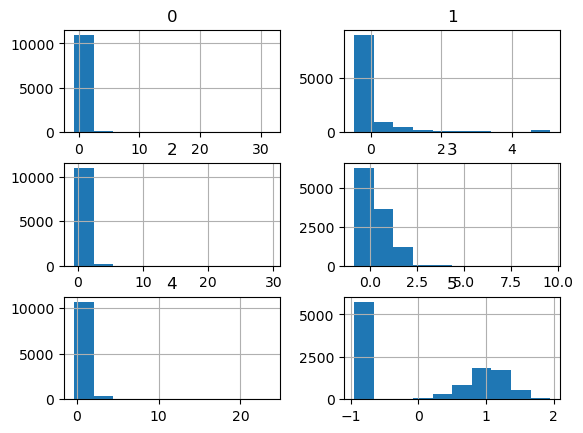

In [3]:
# create histograms of numeric input variables
from pandas import read_csv
from matplotlib import pyplot
# define the dataset location 
filename = PATH
# load the csv file as a data frame 
df = read_csv(filename, header=None) 
# histograms of all variables 
df.hist()
pyplot.show()

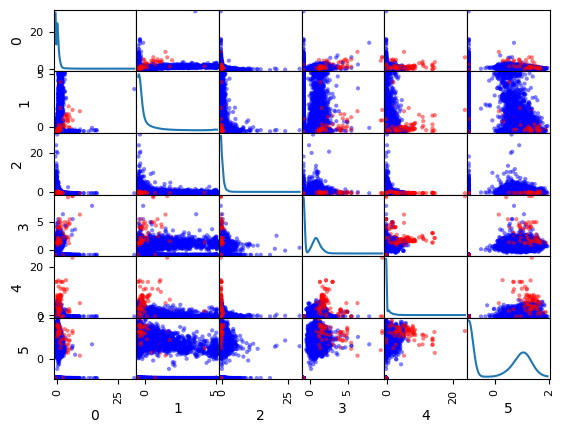

In [5]:

# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# define the dataset location
filename = PATH
# load the csv file as a data frame
df = read_csv(filename, header=None)
# define a mapping of class values to colors
color_dict = {"'-1'":'blue', "'1'":'red'}
# map each row to a color based on the class value 
colors = [color_dict[str(x)] for x in df.values[:, -1]] 
# pairwise scatter plots of all numerical variables 
scatter_matrix(df, diagonal='kde', color=colors) 
pyplot.show()

In [7]:
# test harness and baseline model evaluation
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
  return scores
# define the location of the dataset
full_path = PATH
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y)) # define the reference model
model = DummyClassifier(strategy='stratified') # evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance

print('Mean ROC AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

(11183, 6) (11183,) Counter({0: 10923, 1: 260})
Mean ROC AUC: 0.506 (0.018)


>LR 0.919 (0.042)
>SVM 0.883 (0.038)
>BAG 0.943 (0.027)
>RF 0.950 (0.026)
>GBM 0.919 (0.034)


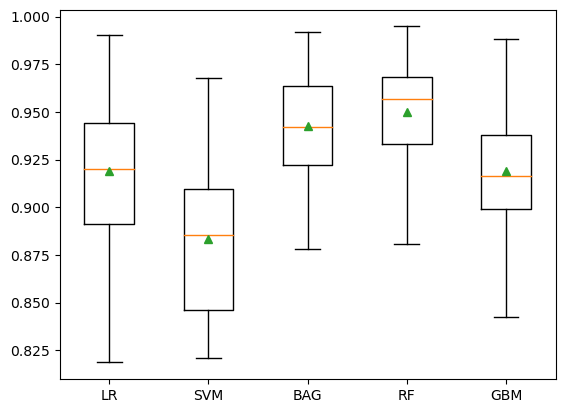

In [8]:
# spot check machine learning algorithms on the mammography dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y

# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
  return scores

# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs')) 
  names.append('LR')
  # SVM
  models.append(SVC(gamma='scale'))
  names.append('SVM')
  # Bagging 
  models.append(BaggingClassifier(n_estimators=1000)) 
  names.append('BAG')
  # RF 
  models.append(RandomForestClassifier(n_estimators=1000)) 
  names.append('RF')
  # GBM 
  models.append(GradientBoostingClassifier(n_estimators=1000)) 
  names.append('GBM')
  return models, names

# define the location of the dataset
full_path = PATH # load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
  # evaluate the model and store results
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Evaluate Cost-Sensitive Algorithms

>LR 0.922 (0.038)
>SVM 0.959 (0.018)
>RF 0.949 (0.029)


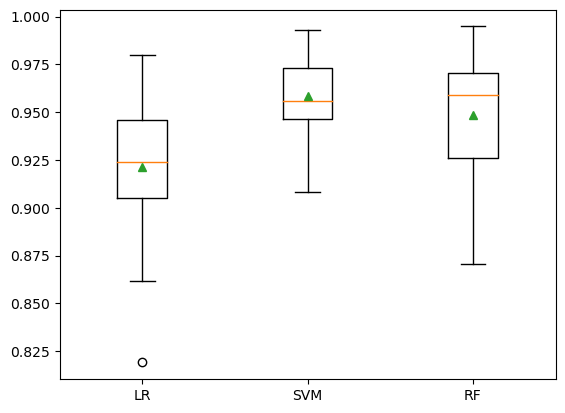

In [10]:
# cost-sensitive machine learning algorithms on the mammography dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
  return scores
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs', class_weight='balanced')) 
  names.append('LR')
  # SVM
  models.append(SVC(gamma='scale', class_weight='balanced')) 
  names.append('SVM')
  # RF
  models.append(RandomForestClassifier(n_estimators=1000)) 
  names.append('RF')
  return models, names
# define the location of the dataset
full_path = PATH # load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
  # defines pipeline steps
  steps = [('p', PowerTransformer()), ('m',models[i])] # define pipeline
  pipeline = Pipeline(steps=steps)
  # evaluate the pipeline and store results
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Make Predictions on New Data

In [12]:

# fit a model and make predictions for the mammography dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# define the location of the dataset
full_path = PATH
# load the dataset
X, y = load_dataset(full_path)
# define model to evaluate
model = SVC(gamma='scale', class_weight='balanced') # power transform then fit model
pipeline = Pipeline(steps=[('t',PowerTransformer()), ('m',model)]) # fit the model
pipeline.fit(X, y)
# evaluate on some no cancer cases (known class 0)
print('No Cancer:')
data = [[0.23001961,5.0725783,-0.27606055,0.83244412,-0.37786573,0.4803223],
  [0.15549112,-0.16939038,0.67065219,-0.85955255,-0.37786573,-0.94572324],
  [-0.78441482,-0.44365372,5.6747053,-0.85955255,-0.37786573,-0.94572324]]
for row in data:
  # make prediction
  yhat = pipeline.predict([row])
  # get the label
  label = yhat[0]
  # summarize
  print('>Predicted=%d (expected 0)' % (label))
# evaluate on some cancer (known class 1)
print('Cancer:')
data = [[2.0158239,0.15353258,-0.32114211,2.1923706,-0.37786573,0.96176503],
  [2.3191888,0.72860087,-0.50146835,-0.85955255,-0.37786573,-0.94572324],
  [0.19224721,-0.2003556,-0.230979,1.2003796,2.2620867,1.132403]]
for row in data:
  # make prediction
  yhat = pipeline.predict([row])
  # get the label
  label = yhat[0]
# summarize
print('>Predicted=%d (expected 1)' % (label))

No Cancer:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
Cancer:
>Predicted=1 (expected 1)
